<a href="https://colab.research.google.com/github/andalmod/Test/blob/main/Kernel_regression_RBF_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


https://youtu.be/hrIad1RVFV0?list=PLE6Wd9FR--EdyJ5lbFl8UuGjecvVw66F6

# Kernel regression and RBFs

In [ ]:
# Real unknown function

#  Train data
N=50
σ=20
noise=np.random.normal(0,σ,N)
#x=np.random.uniform(0,10,size=N)
x=np.linspace(0,10,N)
y=3*x**2+10+noise

# Test data

n=50

xtest=np.linspace(1,8,n)

noise=np.random.normal(0,σ,n)
ytest=3*xtest**2+10+noise



In [ ]:
# KERNEL

def fi(x,lam,mu_i):
  return np.exp(-1/lam*(x-mu_i)**2)

In [ ]:


def calcular(lam,del_2):

  ##### TRAINING ##########

  # genero la matriz fi

  ϕ=np.ones((N,1))

  for mu_i in x:
    fi_i=fi(x,lam,mu_i).reshape(-1,1)
    ϕ=np.hstack((fi_i,ϕ))

  ϕ=np.flip(ϕ,axis=1)

  # Calculo teta_hat.

  size=ϕ.shape[1]

  δ_2=del_2

  delta_Id=δ_2*np.eye(size)

  θ_hat=np.linalg.inv(ϕ.T.dot(ϕ)+delta_Id).dot(ϕ.T).dot(y)

  # calculo el y_predicted.

  yp=ϕ.dot(θ_hat)

  ####### TEST  ############
  # genero la matriz fi
  ϕ_test=np.ones((n,1))

  for mu_i in x:
    fi_i=fi(xtest,lam,mu_i).reshape(-1,1)
    ϕ_test=np.hstack((fi_i,ϕ_test))

  ϕ_test=np.flip(ϕ_test,axis=1)
  # calculo el y_predicted.
  ytest_p=ϕ_test.dot(θ_hat)

  err_train=((y-yp)**2).mean()
  err_test=((ytest_p-ytest)**2).mean()

  return err_train,err_test



In [ ]:
# GRID SEARCH

lambdas=[0.1,1,10]
deltas=[0.1,1,10]
list_l=[]
list_d=[]
train_err=[]
test_err=[]

In [ ]:
for l in lambdas:
  for d in deltas:
    list_l.append(l)
    list_d.append(d)
    a,b=calcular(l,d)
    train_err.append(a)
    test_err.append(b)



In [ ]:
df=pd.DataFrame()
df['lambdas']=list_l
df['deltas']=list_d
df['train_err']=train_err
df['test_err']=test_err
df['max']=max(train_err,test_err)


In [ ]:
df

,lambdas,deltas,train_err,test_err,max
0,0.1,0.1,112.446513,564.242337,564.242337
1,0.1,1.0,375.578042,521.331437,521.331437
2,0.1,10.0,3741.998683,1450.829715,1450.829715
3,1.0,0.1,303.630103,458.859815,458.859815
4,1.0,1.0,360.789538,443.625590,443.625590
5,1.0,10.0,876.645632,443.505257,443.505257
6,10.0,0.1,319.955896,399.313100,399.313100
7,10.0,1.0,417.279646,401.530253,401.530253
8,10.0,10.0,818.371688,529.837696,529.837696


In [ ]:
min_max=min(df['max'])

In [ ]:
min_max

399.3130997785171

In [ ]:
ind_min_max=df[df['max']==min_max].index.values

In [ ]:
lan_opt=float(df['lambdas'].iloc[ind_min_max].values)
del_opt=float(df['deltas'].iloc[ind_min_max].values)


# Ahora vemos cómo queda con los parámetros "óptimos"

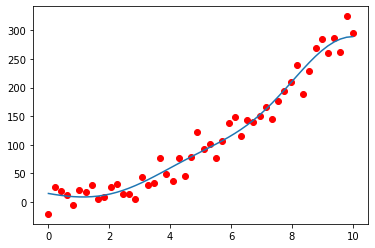

In [ ]:
lam=lan_opt
δ_2=del_opt


ϕ=np.ones((N,1))

for mu_i in x:
  fi_i=fi(x,lam,mu_i).reshape(-1,1)
  ϕ=np.hstack((fi_i,ϕ))

ϕ=np.flip(ϕ,axis=1)

size=ϕ.shape[1]


delta_Id=δ_2*np.eye(size)

θ_hat=np.linalg.inv(ϕ.T.dot(ϕ)+delta_Id).dot(ϕ.T).dot(y)

yp=ϕ.dot(θ_hat)


plt.scatter(x,y,color='r')
plt.plot(x,yp);



In [ ]:
n=50

xtest=np.linspace(1,8,n)


noise=np.random.normal(0,σ,n)
ytest=3*xtest**2+10+noise


ϕ_test=np.ones((n,1))

for mu_i in x:
  fi_i=fi(xtest,lam,mu_i).reshape(-1,1)
  ϕ_test=np.hstack((fi_i,ϕ_test))

ϕ_test=np.flip(ϕ_test,axis=1)

ytest_p=ϕ_test.dot(θ_hat)



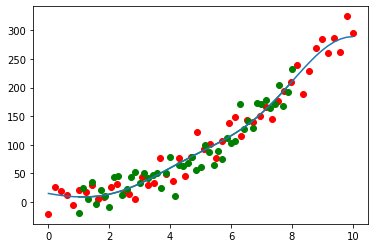

In [ ]:
plt.scatter(x,y,color='r')
plt.scatter(xtest,ytest,color='g')
plt.plot(xtest,ytest_p,color='g')
plt.plot(x,yp);



In [ ]:
((ytest-ytest_p)**2).mean()

376.52550256705496

In [ ]:
((y-yp)**2).mean()

319.95589646347776